# Machine Learning Assignment 4


In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import scikitplot as skplt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

# Boosting and Classification:



### 1. Data Processing

##### a) Import the data from the website directly: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### b) There is no header included, but information on column names is here:

In [3]:
#Reading the column names 
column_names = pd.read_csv('data/names.csv')
target_variable = {'Column_names':'salary'}
column_names = column_names.append(target_variable,ignore_index = True)

In [4]:
#replacing the column names of the data frame
adult_df.columns = column_names['Column_names']
adult_df.head()

Column_names,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####  c) Check your dataframe shape to verify that you have the correct # of rows and columns. Run the following command:

In [5]:
adult_df.shape

(32561, 15)

#### d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

In [6]:
adult_df = adult_df.drop(['fnlwgt'],1)
adult_df.head()

Column_names,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

In [7]:
print(adult_df.isnull().sum())

Column_names
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


There are no missing values present in the dataset

##### f) Use the .replace() method to make the following changes to the "salary" column:
- "<=50K" should become 0
- ">50K" should become 1


In [8]:
adult_df['salary'] = adult_df['salary'].replace("<=50K",0)
adult_df['salary'] = adult_df['salary'].replace(">50K",1)
adult_df.head()

Column_names,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

In [9]:
X = adult_df.iloc[:,0:13]
X.shape

(32561, 13)

#### h) Create your y dataframe (just your target variable). It should only be "salary".



In [10]:
y = adult_df.iloc[:,-1]
y.shape

(32561,)

#### i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe.

In [11]:
X_encoded = pd.get_dummies(X)
X_encoded.shape

(32561, 107)

#### j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [12]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.3, random_state=10)
print('Number of columns in X_train:',len(X_train.columns))
print('Number of columns in X_test:',len(X_test.columns))

Number of columns in X_train: 107
Number of columns in X_test: 107


## 2. Random Forest Classifier - Base Model:

#### Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

#### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.


In [13]:
# Instantiate a random forests classifer
rf = RandomForestClassifier(random_state=20)
# Fitting the data to the data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

#### b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [14]:
# predicted probabilities using .predict_proba()
y_pred_prob = rf.predict_proba(X_test)
# predicted classes using .predict()
y_pred = rf.predict(X_test)

##### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).


In [15]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[6821,  602],
       [ 885, 1461]])

In [16]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7423
           1       0.71      0.62      0.66      2346

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



#### d) Calculate the AUC score (we did this in HW #4 many times).



In [17]:
# calculating roc_auc_score for our target class = 1
print(roc_auc_score(y_test, y_pred_prob[:,0]))

0.1134453535410263


In [18]:
# calculating roc_auc_score for our target class = 0
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.8865547613067332


#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.



In [19]:
#the important features deemed by the model
rf.feature_importances_[:10,]

array([2.25121010e-01, 6.51923575e-02, 1.05782673e-01, 3.48455679e-02,
       1.12376485e-01, 2.00548316e-03, 5.96242397e-03, 6.51415642e-03,
       1.75731854e-08, 1.22900785e-02])

In [20]:
# Assigning the column names
features = X_train.columns[:10,]
features

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private'],
      dtype='object')

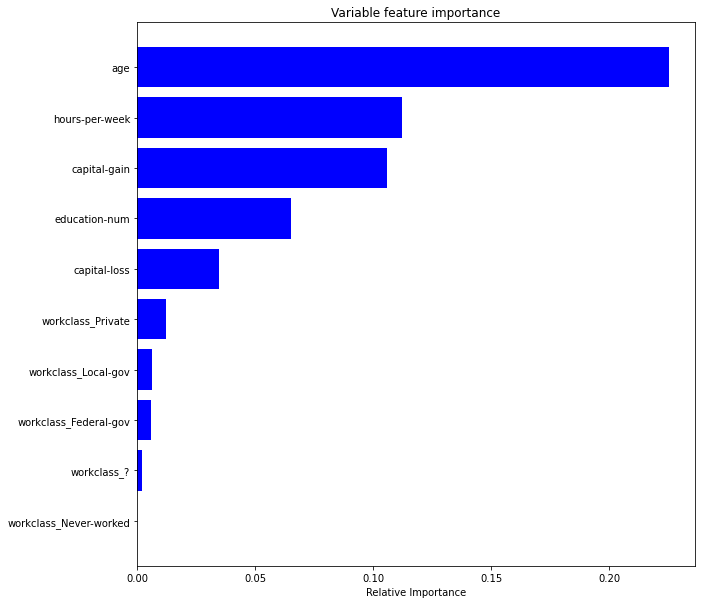

In [21]:
#Barplot to plot the features according to the importance

plt.figure(figsize=(10,10))
importance = rf.feature_importances_[:10,]
indices = np.argsort(importance)
plt.title('Variable feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?



In [22]:
y_pred_train = rf.predict(X_train)

In [23]:
#classification report for our predicted classes and our y_test
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17297
           1       0.97      0.95      0.96      5495

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792



Based on the precision, recall and accuracy values we can say that the values represent a clear scenario of **overfitting**. The model was able to learn perfectly about the train data as well as the noise and hence the **overfit**.

In [24]:
#roc_auc_score for our complete target class
print(roc_auc_score(y_train, y_pred_train))

0.9695086110805269


In [25]:
# roc_auc_score for our complete target class
print(roc_auc_score(y_test, y_pred))

0.770831431167316


$Ans$: The roc_auc_score of the train data is significantly greater than the test data. This signifies that the model is **overfitting**.    
Both the classification report and roc_auc_score signify that the model is prone to overfitting

## 3. AdaBoost Classifier - GridSearch:



#### a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:
- n_estimators: 100, 200, 300, 400
- learning_rate: 0.2,0.4,0.6,0.8,1, 1.2

In [26]:
param_grid = {'n_estimators': [100, 200, 300,400],
'learning_rate': [0.2,0.4,0.6,0.8,1,1.2]}

# create AdaBoost Classifier model 
clf = AdaBoostClassifier()

# Use 5 cross-fold and for scoring use "roc_auc" 
clf_Grid = GridSearchCV(clf, param_grid, cv = 5, scoring = 'roc_auc')

In [27]:
#fit our model to our train data
clf_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc')

#### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [28]:
#To identify the best performing parameters
clf_Grid.best_params_

{'learning_rate': 1.2, 'n_estimators': 400}

In [29]:
#To identify the best performing model
clf_Grid.best_estimator_

AdaBoostClassifier(learning_rate=1.2, n_estimators=400)

In [30]:
# create AdaBoost Classifier model 
clf_best = AdaBoostClassifier(learning_rate=1.2,n_estimators=400)

#fit our model to our train data
clf_best.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.2, n_estimators=400)

In [31]:
#  .predict() to get predicted classes.
y_pred_grid = clf_best.predict(X_test)
y_pred_grid

array([0, 0, 1, ..., 0, 0, 1])

In [32]:
# .predict_proba() to get predicted probabilities.
y_predprob_grid = clf_best.predict_proba(X_test)
y_predprob_grid

array([[0.50286164, 0.49713836],
       [0.50365983, 0.49634017],
       [0.49888145, 0.50111855],
       ...,
       [0.5010009 , 0.4989991 ],
       [0.50131974, 0.49868026],
       [0.49949356, 0.50050644]])

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).


In [33]:
# classification_report_score
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7423
           1       0.78      0.64      0.70      2346

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [34]:
# confusion_matrix
confusion_matrix(y_test, y_pred_grid)

array([[6986,  437],
       [ 834, 1512]])

#### d) Calculate the AUC score


In [35]:
# roc_auc_score for model with GridSearch
print(roc_auc_score(y_test, y_pred_grid))

0.7928151011940837


#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [36]:
#the important features deemed by the model
clf_best.feature_importances_[:10,]

array([0.0975, 0.0125, 0.385 , 0.2825, 0.05  , 0.    , 0.0025, 0.0025,
       0.    , 0.0025])

In [37]:
# Assigning the column names
features = X_train.columns[:10,]
features

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private'],
      dtype='object')

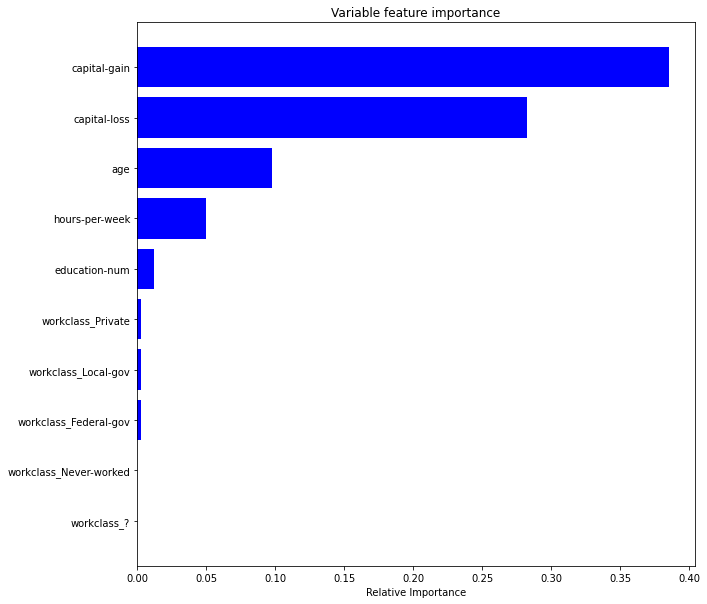

In [38]:
#Barplot to plot the features according to the importance

plt.figure(figsize=(10,10))
importance = clf_best.feature_importances_[:10,]
indices = np.argsort(importance)
plt.title('Variable feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [39]:
y_pred_train = clf_best.predict(X_train)

In [40]:
#classification report for our predicted classes and our y_test
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17297
           1       0.78      0.65      0.71      5495

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



In [41]:
#roc_auc_score for our complete target class
print(roc_auc_score(y_train, y_pred_train))

0.7981092778137219


In [42]:
# roc_auc_score for our complete target class
print(roc_auc_score(y_test, y_pred))

0.770831431167316


$Ans$: By comparing the above classification report with the test classification report, we can infer that the model is not overfitting. The metrics (precision, recall and accuracy) of the training data aren't significantly higher than the test data. So, it's a clear of **no overfitting**.

## 4. Gradient Boosting Classifier - GridSearch:


#### a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:
- n_estimators: 100,200, 300 & 400
- learning_rate: choose 3 learning rates of your choice
- max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)

In [43]:
param_grid = {'n_estimators': [100, 200, 300,400],
'learning_rate': [0.2,1,1.2],
'max_depth':[1,2]}

# create AdaBoost Classifier model 
gbc = GradientBoostingClassifier(random_state=20)

# Use 5 cross-fold and for scoring use "roc_auc" 
gbc_Grid = GridSearchCV(gbc, param_grid, cv = 5, scoring = 'roc_auc')

In [44]:
#fit our model to our train data
gbc_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=20),
             param_grid={'learning_rate': [0.2, 1, 1.2], 'max_depth': [1, 2],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc')

#### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [45]:
#To identify the best performing parameters
gbc_Grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}

In [46]:
#To identify the best performing model
gbc_Grid.best_estimator_



GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=400,
                           random_state=20)

In [47]:
# create GradientBoost Classifier model 
gbc_best = GradientBoostingClassifier(learning_rate=0.2,n_estimators=400,max_depth=2)

#fit our model to our train data
gbc_best.fit(X_train,y_train)



GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=400)

In [48]:
#  .predict() to get predicted classes.
y_pred_grid = gbc_best.predict(X_test)
y_pred_grid


array([0, 0, 1, ..., 0, 0, 1])

In [49]:
# .predict_proba() to get predicted probabilities.
y_predprob_grid = gbc_best.predict_proba(X_test)
y_predprob_grid

array([[0.99266072, 0.00733928],
       [0.99754616, 0.00245384],
       [0.11315526, 0.88684474],
       ...,
       [0.89937547, 0.10062453],
       [0.93040241, 0.06959759],
       [0.30755564, 0.69244436]])

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).



In [50]:
# classification_report_score
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7423
           1       0.78      0.64      0.71      2346

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [51]:
# confusion_matrix
confusion_matrix(y_test, y_pred_grid)

array([[6997,  426],
       [ 833, 1513]])

#### d) Calculate the AUC score



In [52]:
# roc_auc_score for model with GridSearch
print(roc_auc_score(y_test, y_pred_grid))

0.7937691702444615


#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.



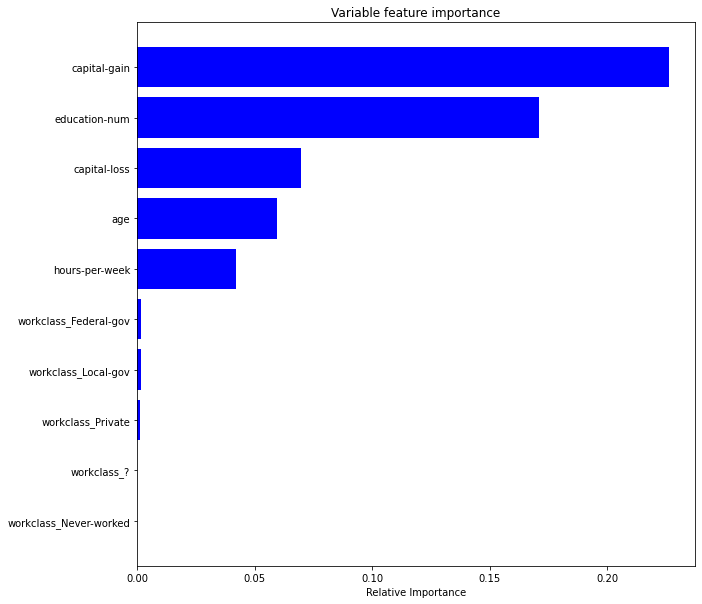

In [53]:
#the important features deemed by the model
gbc_best.feature_importances_[:10,]

# Assigning the column names
features = X_train.columns[:10,]
features


#Barplot to plot the features according to the importance

plt.figure(figsize=(10,10))
importance = gbc_best.feature_importances_[:10,]
indices = np.argsort(importance)
plt.title('Variable feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?



In [54]:
y_pred_train = gbc_best.predict(X_train)

In [55]:
#classification report for our predicted classes and our y_test
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17297
           1       0.80      0.67      0.73      5495

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



In [56]:
#roc_auc_score for our complete target class
print(roc_auc_score(y_train, y_pred_train))

0.8086731655907342


In [57]:
# roc_auc_score for our complete target class
print(roc_auc_score(y_test, y_pred))

0.770831431167316


$Ans$: By comparing the above classification report with the test classification report, we can infer that the model is not overfitting. The metrics (precision, recall and accuracy) of the training data aren't significantly higher than the test data. So, it's a clear case of **no overfitting**.

## 5. XGBoost - RandomizedSearchCV



#### a) Use XtremeGradientBoostingClassifier along with the RandomizedSearchCV tool. Run the RandomizedSearchCV using the following hyperparameters:
- n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)
- learning_rate: 0.1 - 1.6 in increments of 0.1
- max_depth: 1, 2
- gamma: 0 - 5 in increments of 0.25


In [58]:
param_grid = {'n_estimators': [100, 200, 300,400],
'learning_rate': [0.2,1,1.2],
'max_depth':[1,2],
'gamma': np.arange(0, 5.25, 0.25).tolist()}


# create XtremeGradientBoosting Classifier model 
xgb_model = xgb.XGBClassifier()

# Use 5 cross-fold and for scoring use "roc_auc" 
xgb_grid = RandomizedSearchCV(xgb_model, param_grid, cv = 5, scoring = 'roc_auc')

In [59]:
#fit our model to our train data
xgb_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

#### b) Use the best estimator from RandomizedSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.¶

In [60]:
#To identify the best performing parameters
xgb_grid.best_params_

{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 1, 'gamma': 0.0}

In [61]:
#To identify the best performing model
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# create GradientBoost Classifier model 
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#fit our model to our train data
xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
#  .predict() to get predicted classes.
y_pred_grid = xgb_best.predict(X_test)
y_pred_grid

array([0, 0, 1, ..., 0, 0, 1])

In [64]:
# .predict_proba() to get predicted probabilities.
y_predprob_grid = xgb_best.predict_proba(X_test)
y_predprob_grid

array([[9.9848861e-01, 1.5113832e-03],
       [9.9946100e-01, 5.3900009e-04],
       [2.3393631e-01, 7.6606369e-01],
       ...,
       [9.4051850e-01, 5.9481498e-02],
       [9.2378336e-01, 7.6216653e-02],
       [2.9172605e-01, 7.0827395e-01]], dtype=float32)

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [65]:
# classification_report_score
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7423
           1       0.76      0.65      0.70      2346

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



In [66]:
# confusion_matrix
confusion_matrix(y_test, y_pred_grid)

array([[6944,  479],
       [ 815, 1531]])

#### d) Calculate the AUC score

In [67]:
# roc_auc_score for model with GridSearch
print(roc_auc_score(y_test, y_pred_grid))

0.7940355021988178


#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

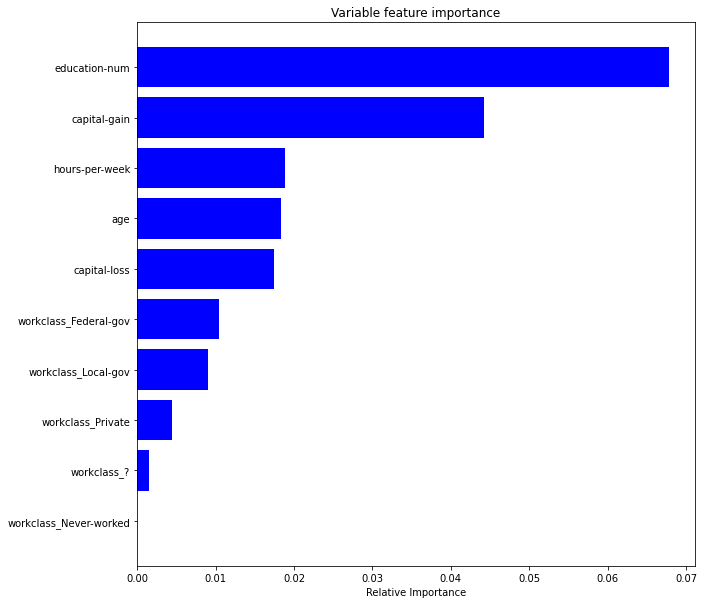

In [68]:
#the important features deemed by the model
xgb_best.feature_importances_[:10,]

# Assigning the column names
features = X_train.columns[:10,]
features


#Barplot to plot the features according to the importance

plt.figure(figsize=(10,10))
importance = xgb_best.feature_importances_[:10,]
indices = np.argsort(importance)
plt.title('Variable feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [69]:
y_pred_train = xgb_best.predict(X_train)

In [70]:
#classification report for our predicted classes and our y_test
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17297
           1       0.79      0.69      0.73      5495

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



In [71]:
#roc_auc_score for our complete target class
print(roc_auc_score(y_train, y_pred_train))

0.8142726418078464


In [72]:
# roc_auc_score for our complete target class
print(roc_auc_score(y_test, y_pred))

0.770831431167316


$Ans$: By comparing the above classification report with the test classification report, we can infer that the model is not overfitting. The metrics (precision, recall and accuracy) of the training data aren't significantly higher than the test data. So, it's a clear case of **no overfitting**.

## 6. Moving into Conceptual Problems:

#### a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

The alpha parameter in the AdaBoost represents the weight assigned to a predictor, the weight is determined based on the weighted error of a particular predictor. The more accurate the predictor is, higher the weight. Following is the formula of the alpha parameter

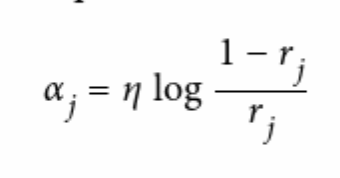

If the algorithm predicts the target variable randomly, the its weight will be close to zero. However, if it is most often wrong (i.e., less <50%), then the weight will be negative.

To summarize,
- Alpha is positive when the predicted sample is classified correctly. In cases with correct classification the predictor weight is decreased from what it was before, since it is already performing well
- Alpha is negative when the predicted sample is classified incorrectly. In cases with correct classification the predictor weight is increased from what it was before,so that the same misclassification does not repeat in the next run


#### b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights. The predicted class is the one that receives the majority of weighted votes.  
Consider an example of a dataset with **a1,a2,a3,a4,a5** as predictors that can predict a heart attack in the patient. The follwing are the weights of the predictors in order **0.5,0.8,0.2,-0.3,0.5**. a1,a2 classify the data as patient has heart attack and the other 3 as patient doesn't have heart attack. At first thought it may look like the patient doesn't have heart attack based on the number of predictors classifying the patient as doesn't have heart attack. However, instead of the majority we consider the predictor ${\alpha}$   and the predictor class would be the one with highest weights.


#### c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?


In gradient boosting, max_depth address the following:

- The maximum depth of a tree.
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample

Basically, the parameter indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. 
It is highly recommended to tune this particular parameter to prevent over-fitting. As mentioned above, the deeper the tree the more the model will learn the relations specific to a particular sample. This increases the chances of overfitting. So, it's an iterative process where we check for the optimum value that prevents over fitting. Also, larger data sets require the depth of trees to be higher to better learn the rules from data.

#### d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).



Following are the top important features from Random forest model: 

    - Age
    - hours per week
    - capital_gain
    - education_num
    - capital_loss

For AdaBoost:  

    - capital_gain
    - capital_loss
    - age
    - hours per week
    - education_num

For Gradient Boosting Classifier:  

    - capital_gain
    - education_num
    - capital_loss
    - Age
    - hours per week
    
For Xtreme Gradient Boosting:  

    -  education_num
    -  capital_gain
    -  hours per week
    -  Age
    -  capital_loss
    
Based on the above, we can observe that the predictors **age, hours_per_week, capital_gain, education_num and capital_loss** are common to all the models. Also, these metrics make perfect sense when predicting whether the salary would be greater than 50,000$ or not. Some of the intutive ones are age, hours_per_week and education_num. The higher the age, hours_per_week and education_num the better the chances for salary being greater than 50,000.

#### e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

   Based on the target variable, **recall** is the metric that decides the best model. The reason being, this particular use case would be highly affected by false negatives i.e., if a person deserves to be paid more than 50,000 and the model predicts the salary to be less than 50,000, the organization would be underpaying a deserving candidate less than the eligible amount and it may result in affecting the morale. So, maximizing the recall would result in lesser false negatives.  
    Based on the above classification reports, all the models have similar f1 scores and accuracy values. So, we can select the model based on auc scores. Following is the classification report of the model. The best model is **XGBoost with RandomizedSearchCV**

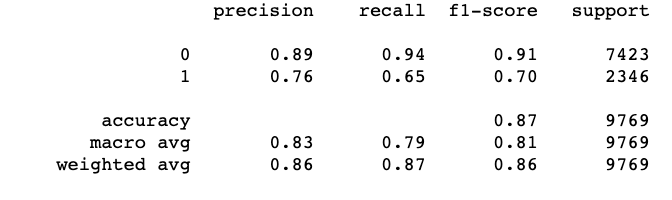


Following are the optimal hyperparameters of the model.  **n_estimators: 200, max_depth: 2, learning_rate: 1.2, gamma: 0.5**


#### f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

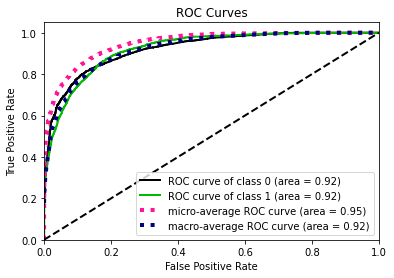

In [77]:
skplt.metrics.plot_roc(y_test, y_predprob_grid) 
plt.show()

ROC is a graph that shows the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate
- False Positive Rate


True Positive Rate (TPR) is a synonym for recall. Following are the formulas of calculating the True positive rate and False Positive Rate.

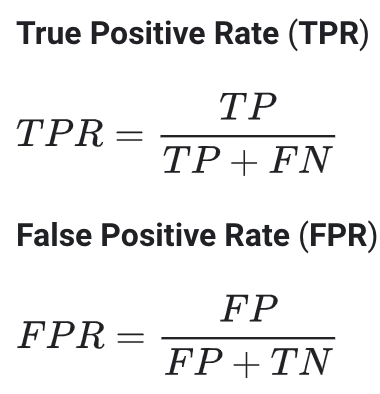

The ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. Classifiers that have the curves closer to the top-left corner indicate a better performance. The same can be observed in the above ROC plot, so we can infer that the classification is performing very good.